# **Árboles de Decisión con `scikit-learn`**


---
---

### **Generalidades**

* Un árbol de decisión es un modelo de aprendizaje supervisado que consiste de una estructura jerárquica que particiona el espacio de características ($\mathbb{R}^d$) en regiones disjuntas mediante divisiones sucesivas.

* Los árboles de decisión se conocen como *tree-like decision support models*, pues toman una estructura de árbol para desarrollar un modelo de decisiones y sus posibles consecuencias.

* Originalmente nacen para problemas de regresión, pero se ha extendido su uso para problemas de regresión.

* Dado un conjunto de datos de entrenamiento de acuerdo al enfoque supervisado, $D=\{\vec{x}_i \in \mathbb{R}^d, ω_i \}_{i=1}^N$ (en donde $\omega _i \in \Omega $ tal que la cardinalidad de $\Omega$ es $|\Omega|=M$), un árbol de decisión $T$ de clasificación puede describirse analíticamente como una función que mapea los vectores de características a un conjunto de $K$ estructuras llamadas *nodos hoja* ($l$):

$$
T: \mathbb{R}^d \rightarrow \{l_1, \dots , l_K\}
$$

* Cada hoja $l_i$ tiene una clase o etiqueta $\omega _i$ asociada.

* En un problema de regresión, el modelo toma la forma:

$$
T: \mathbb{R}^d \rightarrow \mathbb{R}
$$

---

### **Estructura de un árbol de decisión**

En esta ocasión trabajaremos con árboles de decisión para clasificación.

Podemos caracterizar un árbol de decisión mediante los siguientes componentes:

* **Nodo raíz:** Es el punto de partida, de donde se hace la primer división de los datos.

* **División:** La división del nodo raíz en dos o más nodos.

* **Ramas:** Son los resultados de cada prueba, las reglas de clasificación. Hacen referencia a las conexiones entre nodos desde la raíz hasta las hojas.

* **Nodos internos:** Son los nodos resultantes de la división. Pueden verse como una pregunta al problema analizado.

* **Nodos hoja:** Son los últimos nodos del proceso de división. Corresponden al resultado final del árbol de decisión.

Consideremos el siguiente ejemplo del libro *Tan, P.-N., Steinbach, M., & Kumar, V. (2018). Introduction to data mining (2.ª ed.). Pearson.*

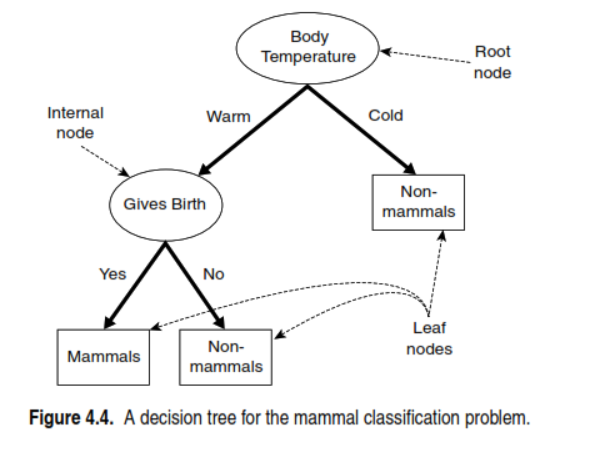



La idea de los árboles de decisión es encontrar las características descriptivas con mayor información con respecto a la característica objetivo (nodo raíz) y luego dividir el dataset de acuerdo a los valores de estas tal que los valores de la característica objetivo para los subconjuntos deben ser lo más puro posible.

---

### **Seleccionando la mejor división**

* Determinar la mejor forma de división toma como punto de partida la probabilidad condicional $P(\omega _i|t)$, que es la probabilidad de que, dado el nodo $t$, un datapoint pertenezca a la clase $\omega _i$ (la fracción de $\vec{x}'s$ que pertenecen a la clase $\omega _i$).

* A $P(\omega _i|t)$ la denotamos también como $P_i$.


* Hay muchas métricas para determinar la mejor forma de división en cada nodo $t$, pero los criterios más comunes para clasificación son:

**1. Information Gain (Entropía):**

Definimos la ganancia de información (o entropía) mediante

$$
IG_t = - \sum _{i=1} ^M P_i log_2 (P_i)
$$

Toma valores en el intervalo $0 \leq IG \leq log_2 (M)$, en donde $M$ es el número de clases. En el caso de clasificación binaria tenemos $0 \leq IG \leq 1$.

Idealmente se busca una entropía mínima, es decir, $IG → 0$, pues disminuyendo la entropía se maximiza la información.


**2. Índice de Gini:**

Definimos el índice de Gini como

$$
GIN_t= 1-\sum _{i=1} ^M P_i ^2
$$

El espectro del índice de Gini es $0 \leq GIN \leq 1 - \frac{1}{M}$. En el caso de clasificación binaria tenemos $0 \leq GIN \leq 0.5$.

Idealmente se busca que el índice de Gini sea mínimo, es decir, $GIN → 0$.

Por ejemplo, dado un problema de clasficación binaria, $D=\{\vec{x}_i \in \mathbb{R}^d, ω_i \in \{A,B\} \}_{i=1}^N$, si $P_A=0.3$ y $P_B=0.7$ tal que el índice de Gini es $0.45$, hablamos de un 45% de probabilidad de clasificar mal una muestra $\vec{x}$.

* Estas medidas buscan identificar primeramente la mejor división de datos evaluando cada característica para ver cuál ofrece la mejor ganancia o pureza.


---

### **Índice de Gini vs Entropía**

| **Característica**                   | **Mejor Métrica** |
|-------------------------------------|-------------------|
| Velocidad                           | Gini              |
| Overfitting menos probable          | Gini              |
| Precisión Teórica                   | Entropía          |
| Robustez                            | Gini              |
| Minimizar la incertidumbre         | Entropía          |
| Mejor para datos categóricos       | Entropía          |
| Mejor para datos mixtos            | Gini              |
| Uso común en el algoritmo ID3      | Entropía          |
| Uso común en el algoritmo CART     | Gini              |



---

### **Crecimiento y poda de un Árbol de decisión**

Un árbol de decisión puede expandirse hasta que no se puedan realiar más divisiones útiles, por lo que para evitar el overfitting se aplica un proceso conocido como *poda del árbol*, la cual tiene dos variantes de implementación:

* **Post-poda (post-pruning):**

Para evitar el sobreajuste se emplea la poda usando [Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf) y un parámetro $\alpha \geq 0$ de penalización para la complejidad del árbol (parámetro de regularización).

La función de costo de un árbol de decisión $T$ de tamaño $S=|T|$ (el tamaño se toma mediante el número de hojas) se define como

$$
C_ \alpha (S)= \alpha S + \sum _{m=1}^{S} C(R_m)
$$

En donde $R_m$ hace referencia a las diferentes regiones a las que pertenecen las clases, es decir, las particiones. Por lo que podemos escribir la ecuación anterior como

$$
C_ \alpha (S)= \alpha S + C(S)
$$

En donde $C(S)$ es el error de entrenamiento del árbol $T$.

Se elige el árbol de decisión óptimo mediante hallar

$$
S^*=ArgMin_{S}\{C_ \alpha (S)\}
$$



* **Pre-poda (pre-pruning):**

Se establecen criterios (hiperparámetros) para detener el crecimiento del árbol antes de que alcance el overfitting. Es decir, se ajustan los posibles hiperparámetros.


---

### **El algoritmo de los Árboles de Decisión**

1. **Inicialización:**

Se define un conjunto de datos de entrenamiento $D=\{\vec{x}_i \in \mathbb{R}^d, ω_i \}_{i=1}^N$

2. **Criterio de división:**

Se elige el mejor vector de características $\vec{x}_j$ según el criterio de entropía o índice de Gini (minimizando estas cantidades).

3. **División recursiva:**

Se crean nodos hijos con los subconjuntos generados por la partición.

4. **Criterio de detención (pre-poda):**

* Si todos los datos en un nodo pertenecen a la misma clase.

* Si el número de muestras en el nodo es menor que un umbral.

* Si la métrica de pureza es mínima.

Esto corresponde al proceso de pre-pruning. Así se limita el crecimiento del árbol durante el entrenamiento definiendo los hiperparámetros.

5. **Post-Poda (opcional):**

Se elimina el ruido y se reduce el overfitting.

En teoría, se pueden abordar ambos procesos de poda, pero comunmente, en la práctica se recomienda trabajar con uno, pues la pre-poda limita el crecimiento del árbol, y a su vez la post-poda permite que el árbol crezca completo y luego elimina ramas innecesarias.

Usar ambos procesos de poda en el mismo algoritmo puede reducir demasiado el árbol y perder información importante.


---

### **Hiperparámetros en `scikit-learn`**

Los árboles de decisión tienen varios hiperparámetros que afectan su rendimiento, entre ellos:

1. **`max_depth`:**

Limita la profundidad máxima del árbol, evitando que crezca demasiado y se sobreajuste. Recibe dos clases de valores:

* Un entero positivo.

* El valor por default `max_depth = None`: No establece una profundidad máxima, sino que el árbol crece hasta que todas las hojas sean puras (que contengan muestras de una sola clase), hasta que cada hoja contenga menos muestras que un umbral, definido como $n_{samples}<$ `min_samples_split`.


2. **`min_samples_split`:**

Es el número mínimo de muestras necesarias para dividir un nodo. Si el nodo tiene un número de muestras menor que la magnitud de este hiperparámetro, se convierte en un nodo hoja, pues ya no se divide.

 Recibe un entero positivo.

3. **`min_samples_leaf`:**

Es el númmero mínimo de muestras en una hoja. Asegura que cada predicción se base en suficientes datos. Recibe dos clases de valores:

* Un entero positivo.

* Un flotante $\in [0,1]$.

4. **`criterion`:**

Es la métrica de división. Recibe los valores:

* `criterion='gini'`: Es el valor por defecto.

* `criterion='entropy'`: Más más costoso computacionalmente que el índice de Gini.

5. **`max_leaf_nodes`:**

Establece el número máximo de nodos hoja permitidos en el árbol. Define el tamaño total del árbol de decisión.

Al igual que `max_depth`, recibe un entero positivo o el valor `None`.

---

### **Sintaxis general en `scikit-learn`**

```
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Conjunto de datos:
X, y = Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state)

#Definiendo el modelo:
DT = DecisionTreeClassifier(
    criterion,
    max_depth,
    min_samples_split,
    min_samples_leaf,
    max_leaf_nodes,
    random_state)

#Entrenando el modelo:
DT.fit(X_train, y_train)

#Predicción:
y_pred = DT.predict(X_test)

#Metricas de clasificación, por ejemplo Accuracy y Matriz de Confusión:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Accuracy:
print("Accuracy:", accuracy_score(y_test, y_pred))

#Matriz de confusión:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

#Visualización del árbol:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(DT, filled=True, feature_names=X.columns, class_names=DT.classes_)
plt.show()

```

---

### **Sintaxis del proceso post-pruning en `scikit-learn`**

```
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Conjunto de datos:
X, y = Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state)

#Modelo sin poda sin pre-poda:
DT = DecisionTreeClassifier(random_state)

#Obteniendo un conjunto de valores para el parámetro de regularización alfa:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

#Entrenar varios árboles con distintos valores de alfa:
DTs = []
for alpha in ccp_alphas:
    DT = DecisionTreeClassifier(random_state, ccp_alpha=alpha)
    DT.fit(X_train, y_train)
    DTs.append(DT)

# Evaluando con la métrica Accuracy:
test_scores = [DT.score(X_test, y_test) for DT in DTs]

# Graficando:
plt.plot(ccp_alphas, test_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy en test")
plt.title("Post-pruning: Accuracy vs ccp_alpha")
plt.show()
```















---

### **Consideraciones de los árboles de decisión en `scikit-learn`**

* ***Valores nulos:***

En principio, los árboles de decisión pueden trabajar con datos nulos, pero el protocolo dentro del preprocesamiento de datos es limpiarlos. Además, en `scikit-learn` los módulos `DecisionTreeClassifier` y `DecisionTreeRegressor` no aceptan directamente valores nulos, como sí lo hacen, por ejemplo, las bibliotecas `XGBoost` y `LightGBM`.


* ***Estandarización:***

Dado que los árboles de decisión se basan en seleccionar los mejores umbrales para las divisiones, no requieren una estandarización de los datos. Cada umbral es independiente para el tipo de escala que tengan las diversas variables, por lo que puede trabajar con datos con diferentes escalas.

* ***Outliers:***

 El modelo de árboles de decisión suele ser robusto a la presencia de outliers, ya que cada decisión se toma con base a condiciones de cada variable, lo que quiere decir que un valor atípico dentro de una instancia generalmente no afectará mucho la estructura del árbol. Es decir, este outlier podrá terminar en una hoja pero no influirá en las divisiones de los demás nodos. Pero, si hay outliers demasiado extremos y en gran cantidad, el umbral de división puede ser más complicado de encontrar y terminar influyendo en la clasificación.


* ***Variables categóricas:***

Mismo caso que para valores nulos, en principio los árboles de decisión pueden trabajar con valores categóricos, pero `scikit-learn` no acepta directamente variables categóricas, como sí lo hace, por ejemplo, `XGBoost`. Al trabajarlas mediante OHE se generan nuevas columnas binarias, en donde la cantidad de estas columnas depende de la cantidad de opciones que se tienen en la columna categórica inicial.

Tener muchas variables categóricas conlleva a que las posibles divisiones del árbol aumenten, haciendo que el modelo pueda llegar a realizar "muchas preguntas" para clasificar un dato y esto dirige a dos puntos, un alto costo computacional y un sobreajuste de los datos. Por lo que la mejor forma de abordar este problema es seleccionar las características más importantes para eliminar la mayor cantidad de variables que aporten menos.


* ***Desbalance de clases:***

El desbalance de clases sí puede afectar el modelo de árboles de decisión, ya que tiende a favorecer la clase mayoritaria.

* ***Conclusión:***

1) Los árboles de decisión no necesitan estandarización y son relativamente robustos a los outliers, además, requieren un preprocesamiento mínimo.

2) Muchas variables categóricas o una variable con alta cardinalidad pueden aumentar la complejidad del modelo y el riesgo de sobreajuste, por lo que las técnicas de poda son cruciales.

---

### **Proyecto: Predicción de la importancia médica en arañas dentro del territorio mexicano.**

Usando la base de datos previamente limpiada, vamos a desarrollar un Árbol de Decisión para clasificación binaria sobre si una araña es de importancia médica o no.

# **Preprocesamiento**

In [177]:
import chardet

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/DT/Arañas2.csv'

with open(file_path, "rb") as f:
    rawdata = f.read(5000)

result = chardet.detect(rawdata)
result



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [178]:
import pandas as pd

df = pd.read_csv(file_path)
display(df.head())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.info())
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f'Tenemos {df.shape[0]} vectores de características con {df.shape[1]} características')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(df.columns)

,Tamaño corporal (mm),Color principal,Número de ojos,Importancia Médica,Hábitat,Especie,Patas con bandas de color,Estado de observación,Encontrada en rincón de casa,Forma del abdomen,Número de Patas
0,21.9,rojizo,8,No,desierto,Araña lobo,no,Yucatán,no,ovalado,8
1,47.8,amarillo,8,No,bosque,Araña de jardin,Si,Baja California,no,redondo,8
2,37.9,negro,6,Si,urbano,Araña violinista,no,Baja California,no,triangular,8
3,31.9,rojizo,8,No,bosque,Tarántula,Si,Yucatán,no,triangular,8
4,12.0,rojizo,8,No,bosque,Araña de jardin,Si,Oaxaca,no,ovalado,8


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tamaño corporal (mm)          133 non-null    float64
 1   Color principal               133 non-null    object 
 2   Número de ojos                133 non-null    int64  
 3   Importancia Médica            133 non-null    object 
 4   Hábitat                       133 non-null    object 
 5   Especie                       133 non-null    object 
 6   Patas con bandas de color     133 non-null    object 
 7   Estado de observación         133 non-null    object 
 8   Encontrada en rincón de casa  133 non-null    object 
 9   Forma del abdomen             133 non-null    object 
 10  Número de Patas               133 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 11.6+ KB
None
°°°°°°°°

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Definiendo el dataset: seleccionamos las características para entrenar el modelo y la variable objetivo
features = ['Número de ojos', 'Patas con bandas de color', 'Encontrada en rincón de casa', 'Color principal', 'Forma del abdomen']
X = df[features]
y = df['Importancia Médica']

#Pipeline: aplicar OHE para transformar las columnas categóricas de X
OHE = ColumnTransformer(transformers=[('OHE', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), features)], remainder='passthrough')

#División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 170119)

# **Árbol de Decisión con hiperparámetros por defecto**

In [180]:
from sklearn.tree import DecisionTreeClassifier

#Pipeline del modelo con el transformador OHE definido antes
modelo = Pipeline(steps=[('preprocessor', OHE), ('classifier', DecisionTreeClassifier(random_state=170119))])

In [181]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

#Predicciones del modelo
y_pred = modelo.predict(X_test)

In [182]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

#Evaluando el modelo
print(f'Las métricas de evaluación son:\n {classification_report(y_test, y_pred)}')
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print("Accuracy:", accuracy_score(y_test, y_pred))



Las métricas de evaluación son:
               precision    recall  f1-score   support

          No       1.00      0.90      0.95        29
          Si       0.79      1.00      0.88        11

    accuracy                           0.93        40
   macro avg       0.89      0.95      0.91        40
weighted avg       0.94      0.93      0.93        40

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Accuracy: 0.925


In [183]:
#Comparación de resultados
tabla = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
display(tabla.head())

,Real,Predicho
72,No,No
90,No,No
88,Si,Si
47,No,No
48,No,No


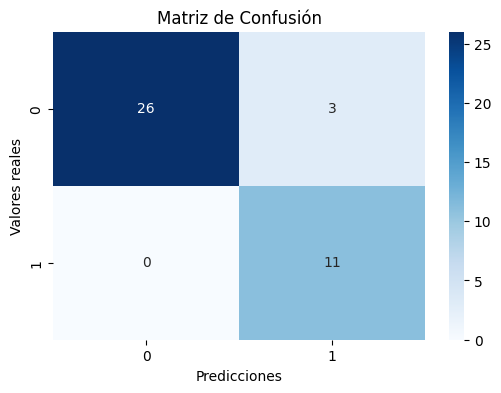

In [184]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

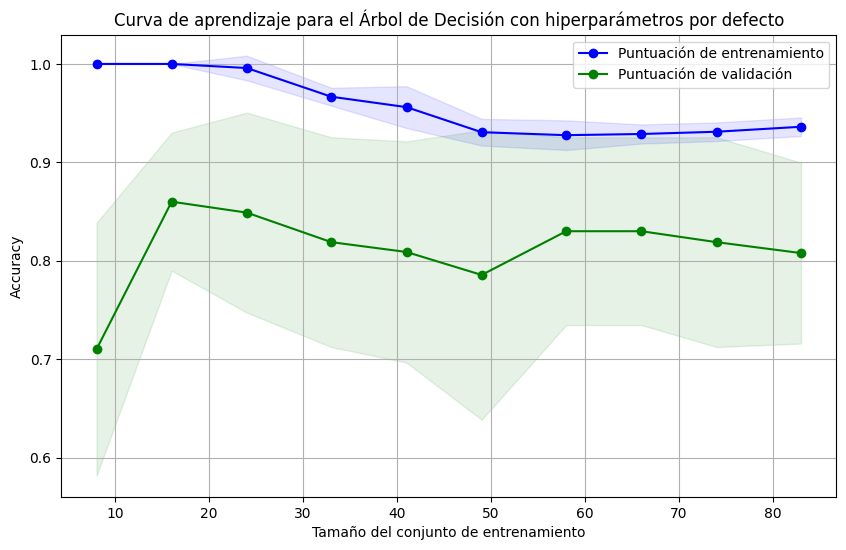

In [185]:
from sklearn.model_selection import learning_curve
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)


#Generando la curva de aprendizaje para observar el posible sobreajuste. Usaremos la métrica Accuracy.
train_sizes, train_scores, test_scores = learning_curve(
    modelo,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy')

#Medias y desviaciones estándar de los scores (en este caso Accuracy)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Gráfica
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuación de entrenamiento", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Puntuación de validación", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Curva de aprendizaje para el Árbol de Decisión con hiperparámetros por defecto")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

# **Árbol de Decisión con hiperparámetros por GridSearchCV**

In [186]:
from sklearn.model_selection import GridSearchCV

#Hiperparámetros
param_grid = {
    'classifier__max_depth':         [1, 2, 5, 10],
    'classifier__min_samples_split': [3, 4, 5, 10],
    'classifier__min_samples_leaf':  [2, 3, 4, 5 ],
}

#GSCV
grid_search = GridSearchCV(estimator=modelo,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

#Entrenamiento
grid_search.fit(X_train, y_train)

#Mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

#Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

#Evaluar
print("Accuracy del mejor modelo:", accuracy_score(y_test, y_pred))

Mejores hiperparámetros encontrados:
{'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Accuracy del mejor modelo: 0.875


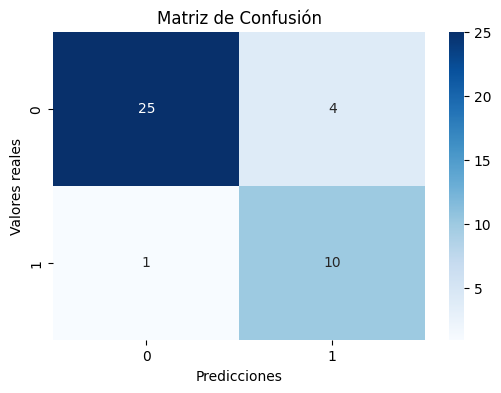

In [187]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

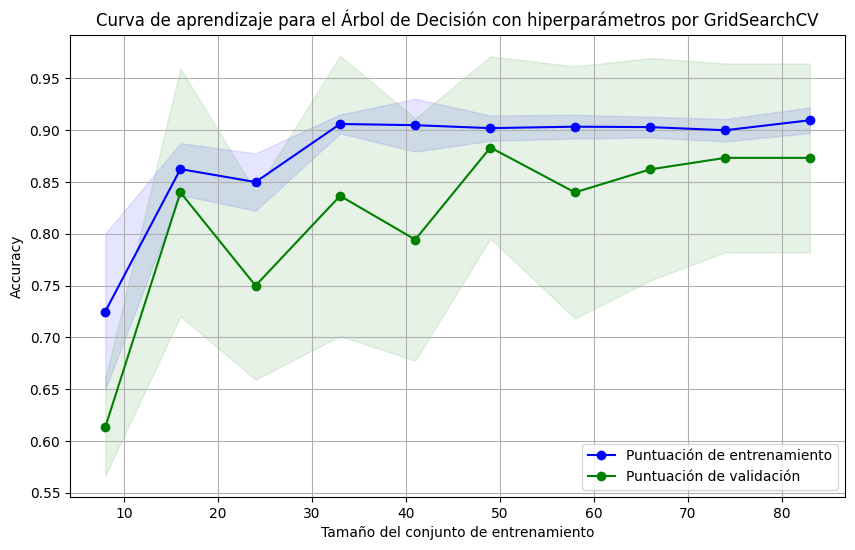

In [188]:
from sklearn.model_selection import learning_curve
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=UserWarning)

#modelo = Pipeline(steps=[('preprocessor', OHE), ('classifier', DecisionTreeClassifier(random_state=170119))])

#Pipeline para la curva
optimos = grid_search.best_params_
pipeline_optimo = Pipeline(steps=[
    ('preprocessor', OHE),
    ("classifier", DecisionTreeClassifier(max_depth=optimos["classifier__max_depth"], min_samples_split=optimos["classifier__min_samples_split"],
                                          min_samples_leaf=optimos["classifier__min_samples_leaf"], random_state=170119))
])



#Generando la curva de aprendizaje para observar el posible sobreajuste. Usaremos la métrica Accuracy.
train_sizes, train_scores, test_scores = learning_curve(
    pipeline_optimo,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy')

#Medias y desviaciones estándar de los scores (en este caso Accuracy)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Gráfica
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuación de entrenamiento", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Puntuación de validación", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Curva de aprendizaje para el Árbol de Decisión con hiperparámetros por GridSearchCV")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

# **El mejor modelo**

Se desarrollaron dos modelos, el primero con hiperparámetros por defecto, el segundo con afinamiento de hiperparámetros mediante el algoritmo [Grid Search Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

Podemos ver que el primer árbol de decisión, aunque con mejores métricas de evaluación, presenta overfitting, del que podemos sospechar desde que las métricas salieron muy cercanas a 1, y corroboramos mediante la curva de aprendizaje.

El segundo árbol posee métricas de rendimiento inferiores, sin embargo mediante las curvas de aprendizaje, podemos ver que el overfitting se redujo bastante, y mientras mayor fue el tamaño del dataset, mejor fue el rendimiento.

Por lo tanto, aunque el segundo árbol tiene una menor métrica de rendimiento, tiene una mejor generalización ante datos que el modelo nunca vio durante su entrenamiento, haciéndolo más robusto y una mejor opción.